In [ ]:
!mkdir -p /content/kitti
!wget -P /content/kitti/ https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_image_2.zip
!wget -P /content/kitti/ https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_label_2.zip
!unzip /content/kitti/data_object_image_2.zip -d /content/kitti/
!unzip /content/kitti/data_object_label_2.zip -d /content/kitti/

--2025-05-03 02:44:51--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_image_2.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.171.225, 3.5.134.178, 3.5.135.201, ...
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.171.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12569945557 (12G) [application/zip]
Saving to: ‘/content/kitti/data_object_image_2.zip’

data_object_image_2 100%[===================>]  11.71G  21.1MB/s    in 9m 33s  

2025-05-03 02:54:25 (20.9 MB/s) - ‘/content/kitti/data_object_image_2.zip’ saved [12569945557/12569945557]

--2025-05-03 02:54:25--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_label_2.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 3.5.135.11, 3.5.138.109, 52.219.170.5, ...
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|3.5.135.11|:443... connected.
HTTP request sent,

In [ ]:
!pip install ultralytics albumentations tqdm opencv-python

In [ ]:
!pip install albumentations

Starting KITTI dataset preprocessing...


100%|██████████| 7481/7481 [00:00<00:00, 31588.15it/s]


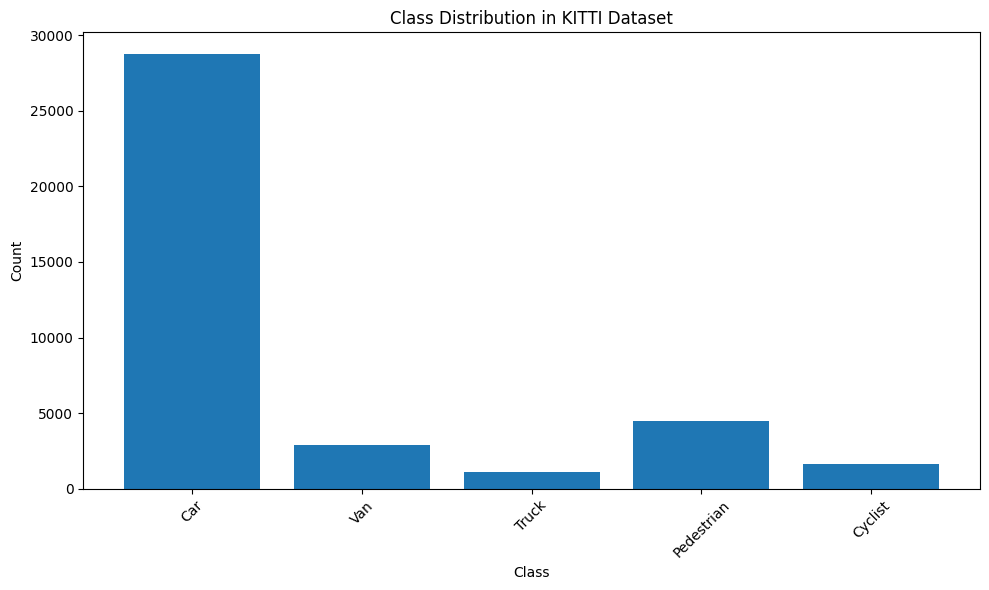

Class distribution: {'Car': 28742, 'Van': 2914, 'Truck': 1094, 'Pedestrian': 4487, 'Cyclist': 1627}


Processing validation data: 100%|██████████| 1497/1497 [00:20<00:00, 72.53it/s]


Implementing class balancing for: ['Cyclist', 'Truck']
Scanning dataset for target classes...


100%|██████████| 6029/6029 [00:00<00:00, 24571.97it/s]
/tmp/ipykernel_55/3107781998.py:246: UserWarning: Argument(s) 'fog_coef_lower, fog_coef_upper' are not valid for transform RandomFog
  A.RandomFog(fog_coef_lower=0.1, fog_coef_upper=0.3, p=0.1),  # Note: these params might need to be checked


Found images with target classes: {4: 884, 2: 883}
Target counts per class: {4: 884, 2: 884}
Generating balanced dataset...
No additional images needed for Cyclist
Generating 1 additional images for Truck


100%|██████████| 1/1 [00:00<00:00, 21.10it/s]


Created 1 augmented and 0 duplicated images for Truck
Merging augmented data with original training data...
Data merging complete!


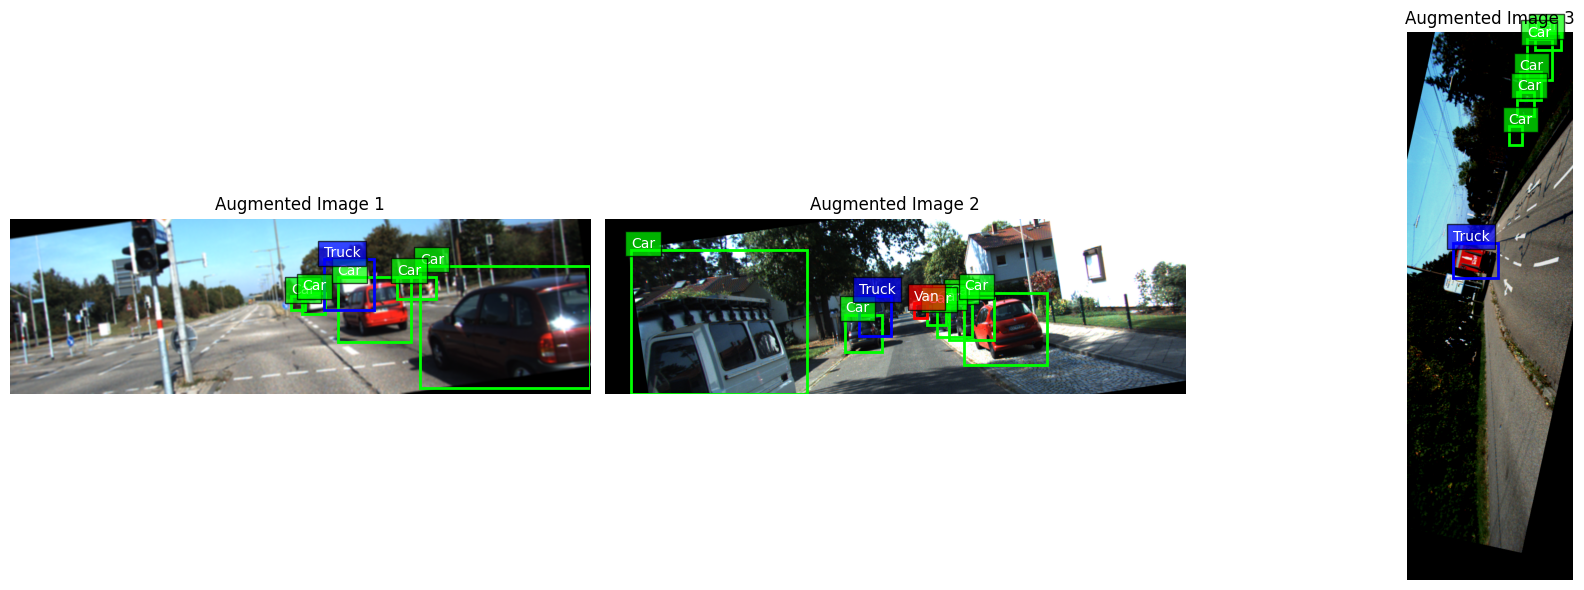

Counting class distribution...


100%|██████████| 6030/6030 [00:00<00:00, 30355.28it/s]



Class distribution after balancing:
Class      Objects  Images  
------------------------------
Car        23185    5398    
Van        2310     1702    
Truck      945      890     
Pedestrian 3652     1434    
Cyclist    1306     929     


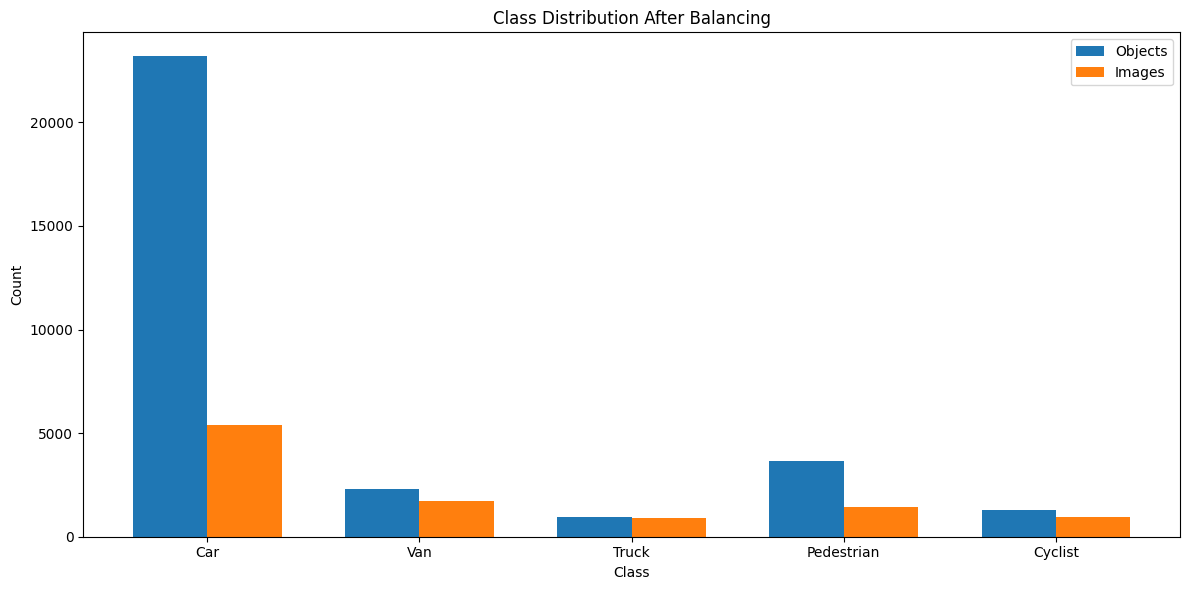

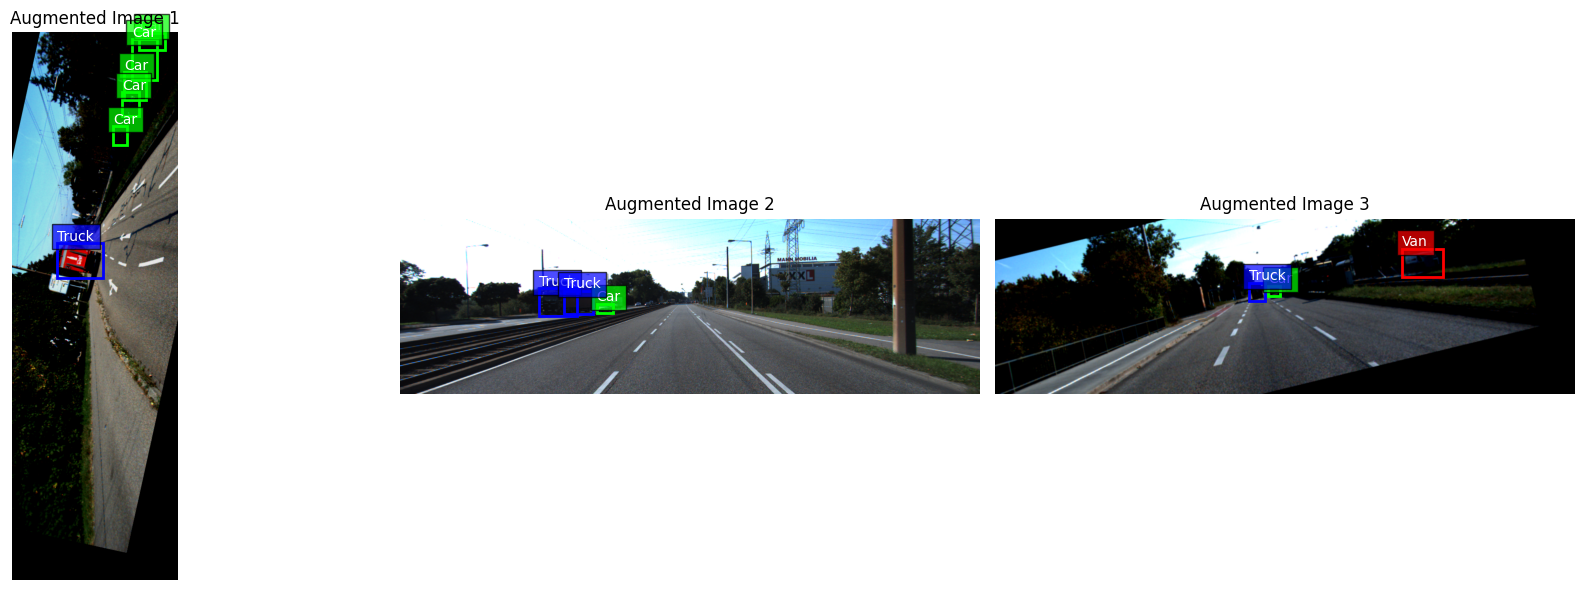

Counting class distribution...


100%|██████████| 6030/6030 [00:00<00:00, 29494.71it/s]



Class distribution after balancing:
Class      Objects  Images  
------------------------------
Car        23185    5398    
Van        2310     1702    
Truck      945      890     
Pedestrian 3652     1434    
Cyclist    1306     929     


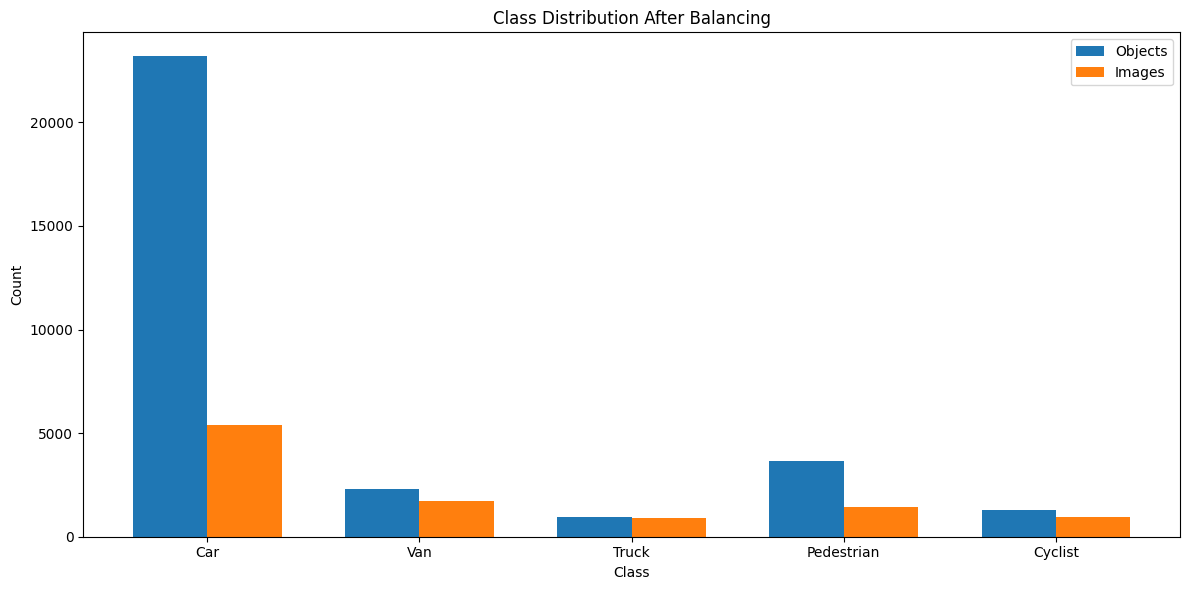

Created dataset config at /content/kitti/yolo_dataset/kitti.yaml
Training YOLO model...


100%|██████████| 6.25M/6.25M [00:00<00:00, 7.87MB/s]


Ultralytics 8.3.124 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/kitti/yolo_dataset/kitti.yaml, epochs=30, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=/kaggle/working/runs, name=yolov8_kitti, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 29.6MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 121MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3428.4±646.1 MB/s, size: 842.7 KB)


train: Scanning /content/kitti/yolo_dataset/labels/train... 6030 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6030/6030 [00:29<00:00, 202.90it/s]


train: New cache created: /content/kitti/yolo_dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2298.2±1971.6 MB/s, size: 826.8 KB)


val: Scanning /content/kitti/yolo_dataset/labels/val... 1497 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1497/1497 [00:07<00:00, 192.25it/s]

val: New cache created: /content/kitti/yolo_dataset/labels/val.cache


Plotting labels to /kaggle/working/runs/yolov8_kitti/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/runs/yolov8_kitti
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.21G      1.361      1.602      1.078        127        640: 100%|██████████| 377/377 [01:17<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:10<00:00,  4.50it/s]


                   all       1497       7726      0.556      0.482       0.51      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.23G      1.255      1.079      1.055        186        640: 100%|██████████| 377/377 [01:13<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:09<00:00,  5.19it/s]


                   all       1497       7726      0.677      0.545      0.597      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.23G      1.236     0.9788      1.052        139        640: 100%|██████████| 377/377 [01:12<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]


                   all       1497       7726      0.696      0.533      0.603      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.23G      1.194     0.9128      1.039        161        640: 100%|██████████| 377/377 [01:12<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.40it/s]


                   all       1497       7726      0.728      0.559       0.64      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.23G      1.159     0.8559      1.026        151        640: 100%|██████████| 377/377 [01:12<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]


                   all       1497       7726      0.728      0.576      0.665      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.23G      1.137     0.8221      1.017        149        640: 100%|██████████| 377/377 [01:11<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]


                   all       1497       7726      0.757      0.635      0.702       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.23G      1.111     0.7939      1.005        129        640: 100%|██████████| 377/377 [01:11<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]


                   all       1497       7726      0.766      0.657      0.736      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.23G      1.089     0.7687          1        128        640: 100%|██████████| 377/377 [01:12<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]


                   all       1497       7726      0.788      0.637      0.729      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.23G      1.074     0.7439     0.9934        135        640: 100%|██████████| 377/377 [01:11<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.33it/s]


                   all       1497       7726      0.737       0.67       0.73      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.23G      1.057     0.7303     0.9866        148        640: 100%|██████████| 377/377 [01:12<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]


                   all       1497       7726      0.823      0.651      0.761      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.23G      1.043     0.7124     0.9824        139        640: 100%|██████████| 377/377 [01:12<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]

                   all       1497       7726      0.824      0.669      0.774      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.23G       1.03     0.6973     0.9795        133        640: 100%|██████████| 377/377 [01:12<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]


                   all       1497       7726       0.85      0.671      0.785       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.23G      1.017     0.6855     0.9732        144        640: 100%|██████████| 377/377 [01:11<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.39it/s]


                   all       1497       7726      0.865      0.694        0.8      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.23G     0.9926     0.6567     0.9643         99        640: 100%|██████████| 377/377 [01:12<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]


                   all       1497       7726      0.837      0.709      0.797      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.23G     0.9874     0.6503     0.9627        151        640: 100%|██████████| 377/377 [01:11<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]


                   all       1497       7726      0.868      0.708      0.815      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.23G     0.9715     0.6356     0.9562        178        640: 100%|██████████| 377/377 [01:12<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]


                   all       1497       7726      0.867      0.716      0.823      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.23G     0.9588     0.6283     0.9526        128        640: 100%|██████████| 377/377 [01:11<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]


                   all       1497       7726      0.863      0.737      0.834      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.23G     0.9447     0.6126     0.9458        142        640: 100%|██████████| 377/377 [01:12<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]

                   all       1497       7726      0.878      0.731      0.841      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.23G     0.9293     0.6019     0.9439        137        640: 100%|██████████| 377/377 [01:11<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.58it/s]


                   all       1497       7726        0.9       0.74      0.847      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.23G     0.9161     0.5902     0.9383        126        640: 100%|██████████| 377/377 [01:11<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.59it/s]


                   all       1497       7726      0.875      0.765      0.858      0.602
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.23G     0.9006     0.5666     0.9312         41        640: 100%|██████████| 377/377 [01:12<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.61it/s]


                   all       1497       7726      0.875      0.764      0.852      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.23G     0.8781     0.5473      0.924         84        640: 100%|██████████| 377/377 [01:11<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]


                   all       1497       7726      0.889      0.756      0.853      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.23G     0.8634     0.5345     0.9198         57        640: 100%|██████████| 377/377 [01:11<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]


                   all       1497       7726      0.888      0.766      0.861      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.23G     0.8529     0.5268     0.9137         99        640: 100%|██████████| 377/377 [01:10<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.61it/s]


                   all       1497       7726        0.9      0.765      0.862      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.23G     0.8393     0.5174     0.9101         70        640: 100%|██████████| 377/377 [01:10<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.60it/s]


                   all       1497       7726      0.896      0.775      0.868      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.23G     0.8293     0.5116     0.9097         68        640: 100%|██████████| 377/377 [01:10<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.36it/s]


                   all       1497       7726      0.897      0.779       0.87      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.23G     0.8235     0.5067     0.9043         59        640: 100%|██████████| 377/377 [01:10<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.58it/s]


                   all       1497       7726      0.912      0.779      0.875      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.23G     0.8184      0.501     0.9042         66        640: 100%|██████████| 377/377 [01:10<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.27it/s]


                   all       1497       7726      0.894      0.788      0.875      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.23G       0.81     0.4987     0.9019         76        640: 100%|██████████| 377/377 [01:10<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]


                   all       1497       7726      0.888      0.793      0.875      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.23G     0.8076      0.497     0.9023         75        640: 100%|██████████| 377/377 [01:10<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:09<00:00,  5.17it/s]


                   all       1497       7726      0.883      0.796      0.874      0.628

30 epochs completed in 0.674 hours.
Optimizer stripped from /kaggle/working/runs/yolov8_kitti/weights/last.pt, 6.2MB
Optimizer stripped from /kaggle/working/runs/yolov8_kitti/weights/best.pt, 6.2MB

Validating /kaggle/working/runs/yolov8_kitti/weights/best.pt...
Ultralytics 8.3.124 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:09<00:00,  4.75it/s]


                   all       1497       7726       0.89      0.791      0.874      0.628
                   Car       1331       5731      0.899      0.891      0.945      0.747
                   Van        461        627      0.901      0.801      0.904      0.683
                 Truck        191        197      0.947      0.914      0.941      0.756
            Pedestrian        351        844      0.827      0.632      0.759      0.435
               Cyclist        215        327      0.877      0.719      0.819      0.519


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/runs/yolov8_kitti
❌ Model not found at expected path: /kaggle/working/runs/yolov8_kitti/weights/bestt.pt
Evaluating model...
Ultralytics 8.3.124 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3862.0±1330.7 MB/s, size: 843.9 KB)


val: Scanning /content/kitti/yolo_dataset/labels/val.cache... 1497 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1497/1497 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:10<00:00,  9.15it/s]


                   all       1497       7726      0.884      0.797      0.875      0.628
                   Car       1331       5731      0.892      0.895      0.945      0.748
                   Van        461        627      0.897      0.808      0.904      0.683
                 Truck        191        197      0.945      0.914      0.942      0.754
            Pedestrian        351        844      0.809      0.645      0.763      0.435
               Cyclist        215        327      0.876      0.722      0.824      0.521


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/runs/yolov8_kitti
Validation Results:
mAP@0.5: 0.875397602589629
mAP@0.5-0.95: 0.6281749221022935
No metrics available for class Car
No metrics available for class Van
No metrics available for class Truck
No metrics available for class Pedestrian
No metrics available for class Cyclist
Testing on a single image...

image 1/1 /content/kitti/yolo_dataset/images/val/002147.png: 224x640 18 Cars, 3 Vans, 1 Pedestrian, 34.8ms
Speed: 1.7ms preprocess, 34.8ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Results saved to /kaggle/working/runs/yolov8_kitti


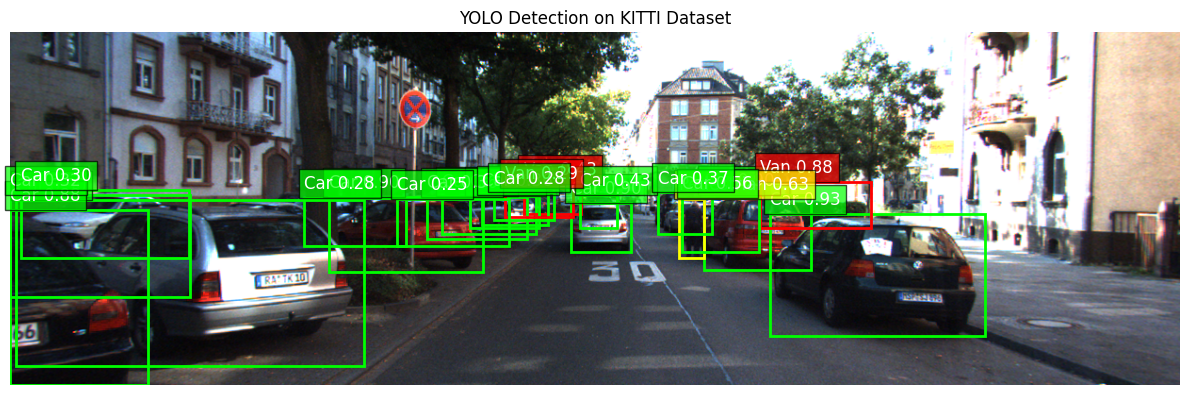

Detected 22 objects
Detections per class:
  Car: 18
  Van: 3
  Pedestrian: 1
Processing complete!


In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import shutil
import random
from sklearn.model_selection import train_test_split
import torch
from ultralytics import YOLO
from PIL import Image
from collections import defaultdict
import albumentations as A  # You'll need to install this: pip install albumentations

# Define paths
DATA_ROOT = "/content/kitti"
IMAGE_DIR = os.path.join(DATA_ROOT, "training/image_2")
LABEL_DIR = os.path.join(DATA_ROOT, "training/label_2")
OUTPUT_DIR = os.path.join(DATA_ROOT, "yolo_dataset")

# Create directories for YOLO format
os.makedirs(os.path.join(OUTPUT_DIR, "images", "train"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "images", "val"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "labels", "train"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "labels", "val"), exist_ok=True)

# KITTI categories to YOLO class mapping
# In YOLO format, we'll use class indices 0:car, 1:van, 2:truck, 3:pedestrian, 4:cyclist
kitti_to_yolo = {
    'Car': 0,
    'Van': 1,
    'Truck': 2,
    'Pedestrian': 3,
    'Cyclist': 4,
    # Ignore other categories
}

def convert_kitti_to_yolo(kitti_label_path, img_width, img_height):
    """
    Convert KITTI format labels to YOLO format:
    YOLO format: <class> <x_center> <y_center> <width> <height>
    where all values are normalized between 0 and 1
    """
    yolo_labels = []
    
    with open(kitti_label_path, 'r') as f:
        lines = f.readlines()
        
    for line in lines:
        parts = line.strip().split(' ')
        obj_class = parts[0]
        
        # Skip if not in our selected classes
        if obj_class not in kitti_to_yolo:
            continue
            
        # KITTI format: [left, top, right, bottom] in pixels
        bbox_left = float(parts[4])
        bbox_top = float(parts[5])
        bbox_right = float(parts[6])
        bbox_bottom = float(parts[7])
        
        # Convert to YOLO format: [x_center, y_center, width, height] normalized
        x_center = ((bbox_left + bbox_right) / 2) / img_width
        y_center = ((bbox_top + bbox_bottom) / 2) / img_height
        width = (bbox_right - bbox_left) / img_width
        height = (bbox_bottom - bbox_top) / img_height
        
        # Add to labels in YOLO format
        yolo_label = f"{kitti_to_yolo[obj_class]} {x_center} {y_center} {width} {height}"
        yolo_labels.append(yolo_label)
        
    return yolo_labels

def create_dataset_visualization(images_list):
    """Create visualization of class distribution in dataset"""
    class_counts = {k: 0 for k in kitti_to_yolo.keys()}
    
    for img_name in tqdm(images_list):
        label_path = os.path.join(LABEL_DIR, img_name.replace('.png', '.txt'))
        
        with open(label_path, 'r') as f:
            lines = f.readlines()
            
        for line in lines:
            parts = line.strip().split(' ')
            obj_class = parts[0]
            if obj_class in kitti_to_yolo:
                class_counts[obj_class] += 1
    
    # Plot distribution
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.title('Class Distribution in KITTI Dataset')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, 'class_distribution.png'))
    plt.show()
    
    return class_counts

def preprocess_data():
    """Preprocess KITTI data and convert to YOLO format"""
    # Get all image files
    image_files = [f for f in os.listdir(IMAGE_DIR) if f.endswith('.png')]
    
    # Analyze class distribution
    class_counts = create_dataset_visualization(image_files)
    print(f"Class distribution: {class_counts}")
    
    # Split into train and validation sets
    train_images, val_images = train_test_split(image_files, test_size=0.2, random_state=42)
    
    # Process and copy training data
    for img_name in tqdm(train_images, desc="Processing training data"):
        img_path = os.path.join(IMAGE_DIR, img_name)
        label_path = os.path.join(LABEL_DIR, img_name.replace('.png', '.txt'))
        
        # Get image dimensions
        img = cv2.imread(img_path)
        img_height, img_width = img.shape[:2]
        
        # Convert labels to YOLO format
        yolo_labels = convert_kitti_to_yolo(label_path, img_width, img_height)
        
        # Skip images with no valid labels (no objects in our selected classes)
        if not yolo_labels:
            continue
        
        # Copy image
        shutil.copy(img_path, os.path.join(OUTPUT_DIR, "images", "train", img_name))
        
        # Write YOLO labels
        with open(os.path.join(OUTPUT_DIR, "labels", "train", img_name.replace('.png', '.txt')), 'w') as f:
            f.write('\n'.join(yolo_labels))
    
    # Process and copy validation data
    for img_name in tqdm(val_images, desc="Processing validation data"):
        img_path = os.path.join(IMAGE_DIR, img_name)
        label_path = os.path.join(LABEL_DIR, img_name.replace('.png', '.txt'))
        
        # Get image dimensions
        img = cv2.imread(img_path)
        img_height, img_width = img.shape[:2]
        
        # Convert labels to YOLO format
        yolo_labels = convert_kitti_to_yolo(label_path, img_width, img_height)
        
        # Skip images with no valid labels
        if not yolo_labels:
            continue
        
        # Copy image
        shutil.copy(img_path, os.path.join(OUTPUT_DIR, "images", "val", img_name))
        
        # Write YOLO labels
        with open(os.path.join(OUTPUT_DIR, "labels", "val", img_name.replace('.png', '.txt')), 'w') as f:
            f.write('\n'.join(yolo_labels))

def implement_class_balancing(target_classes=["Cyclist", "Truck"]):
    """
    Implement class-specific balancing for target classes using:
    1. Oversampling - duplicate images with target classes
    2. Augmentation - apply transformations to images with target classes
    
    Args:
        target_classes: List of classes to balance
    """
    print(f"Implementing class balancing for: {target_classes}")
    
    # Define paths for training data
    train_images_dir = os.path.join(OUTPUT_DIR, "images", "train")
    train_labels_dir = os.path.join(OUTPUT_DIR, "labels", "train")
    
    # Create directory for augmented data
    augmented_dir = os.path.join(OUTPUT_DIR, "augmented")
    os.makedirs(os.path.join(augmented_dir, "images"), exist_ok=True)
    os.makedirs(os.path.join(augmented_dir, "labels"), exist_ok=True)
    
    # Reverse mapping for easy reference
    yolo_to_kitti = {v: k for k, v in kitti_to_yolo.items()}
    
    # Find all images containing our target classes
    target_class_ids = [kitti_to_yolo[cls] for cls in target_classes]
    images_with_target_classes = defaultdict(list)
    
    print("Scanning dataset for target classes...")
    for label_file in tqdm(os.listdir(train_labels_dir)):
        image_file = label_file.replace('.txt', '.png')
        image_path = os.path.join(train_images_dir, image_file)
        label_path = os.path.join(train_labels_dir, label_file)
        
        # Skip if image doesn't exist
        if not os.path.exists(image_path):
            continue
        
        # Check if file contains target classes
        with open(label_path, 'r') as f:
            lines = f.readlines()
            
        for line in lines:
            # First convert to float, then to int to handle values like '0.0'
            class_id = int(float(line.strip().split(' ')[0]))
            if class_id in target_class_ids:
                images_with_target_classes[class_id].append((image_path, label_path))
                break
    
    # Count instances of each class
    class_counts = {cls_id: len(images) for cls_id, images in images_with_target_classes.items()}
    print(f"Found images with target classes: {class_counts}")
    
    # Determine how many augmentations to create for each class
    # We'll aim for similar numbers of the target classes
    max_count = max(class_counts.values()) if class_counts else 0
    if max_count == 0:
        print("No images found with target classes. Cannot proceed with balancing.")
        return
    
    target_counts = {}
    for cls_id in target_class_ids:
        current_count = class_counts.get(cls_id, 0)
        if current_count == 0:
            print(f"Warning: No images found for class {yolo_to_kitti[cls_id]}")
            continue
            
        # Calculate how many more samples we need
        target_counts[cls_id] = max_count
        
    print(f"Target counts per class: {target_counts}")
    
    # Define strong augmentation pipeline
    augmentation_pipeline = A.Compose([
        # Geometric transformations
        A.HorizontalFlip(p=0.5),
        A.RandomRotate90(p=0.2),
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=15, p=0.5),
        
        # Color transformations
        A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5),
        A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=25, val_shift_limit=10, p=0.3),
        A.GaussianBlur(blur_limit=(3, 7), p=0.2),  # Fixed: using GaussianBlur instead of GaussNoise with var_limit
        
        # Weather simulations for autonomous driving
        A.RandomFog(fog_coef_lower=0.1, fog_coef_upper=0.3, p=0.1),  # Note: these params might need to be checked
        A.RandomRain(p=0.1),  # Removed problematic parameters
        A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), p=0.2),
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['class_ids']))  # Fixed: specify YOLO format directly
    
    # Process each target class
    print("Generating balanced dataset...")
    for cls_id in target_class_ids:
        class_name = yolo_to_kitti[cls_id]
        
        if cls_id not in class_counts or class_counts[cls_id] == 0:
            print(f"Skipping {class_name}: no source images")
            continue
            
        current_count = class_counts[cls_id]
        target_count = target_counts[cls_id]
        images_to_generate = target_count - current_count
        
        if images_to_generate <= 0:
            print(f"No additional images needed for {class_name}")
            continue
            
        print(f"Generating {images_to_generate} additional images for {class_name}")
        
        # Get source images for this class
        source_images = images_with_target_classes[cls_id]
        
        # Augment or duplicate images
        augmentation_count = 0
        duplication_count = 0
        
        for i in tqdm(range(images_to_generate)):
            # Pick a random source image
            img_path, label_path = random.choice(source_images)
            img_name = os.path.basename(img_path)
            label_name = os.path.basename(label_path)
            
            # Decide whether to augment or duplicate
            if random.random() < 0.7:  # 70% chance to augment
                # Read image and labels
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                height, width = image.shape[:2]
                
                # Get bounding boxes in YOLO format directly
                bboxes = []
                class_ids = []
                
                with open(label_path, 'r') as f:
                    lines = f.readlines()
                
                for line in lines:
                    parts = line.strip().split(' ')
                    cls = int(parts[0])
                    # YOLO format: center_x, center_y, width, height (normalized)
                    cx, cy, w, h = map(float, parts[1:5])
                    
                    # Keep in YOLO format for Albumentations
                    bboxes.append([cx, cy, w, h])
                    class_ids.append(cls)
                
                # Skip if no bounding boxes (shouldn't happen, but just in case)
                if not bboxes:
                    continue
                
                try:
                    # Apply augmentation - using YOLO format
                    transformed = augmentation_pipeline(
                        image=image,
                        bboxes=bboxes,
                        class_ids=class_ids
                    )
                    
                    # Get augmented data
                    aug_image = transformed['image']
                    aug_bboxes = transformed['bboxes']
                    aug_class_ids = transformed['class_ids']
                    
                    # Save augmented image
                    aug_img_name = f"aug_{i}_{img_name}"
                    aug_label_name = aug_img_name.replace('.png', '.txt')
                    
                    cv2.imwrite(os.path.join(augmented_dir, "images", aug_img_name), 
                              cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR))
                    
                    # Save labels in YOLO format (they're already in YOLO format)
                    with open(os.path.join(augmented_dir, "labels", aug_label_name), 'w') as f:
                        for bbox, cls in zip(aug_bboxes, aug_class_ids):
                            cx, cy, w, h = bbox
                            f.write(f"{cls} {cx} {cy} {w} {h}\n")
                    
                    augmentation_count += 1
                    
                except Exception as e:
                    print(f"Error during augmentation: {e}")
                    # If augmentation fails, just duplicate the image
                    dup_img_name = f"dup_{i}_{img_name}"
                    dup_label_name = dup_img_name.replace('.png', '.txt')
                    
                    shutil.copy(img_path, os.path.join(augmented_dir, "images", dup_img_name))
                    shutil.copy(label_path, os.path.join(augmented_dir, "labels", dup_label_name))
                    
                    duplication_count += 1
            else:
                # Just duplicate the image
                dup_img_name = f"dup_{i}_{img_name}"
                dup_label_name = dup_img_name.replace('.png', '.txt')
                
                shutil.copy(img_path, os.path.join(augmented_dir, "images", dup_img_name))
                shutil.copy(label_path, os.path.join(augmented_dir, "labels", dup_label_name))
                
                duplication_count += 1
        
        print(f"Created {augmentation_count} augmented and {duplication_count} duplicated images for {class_name}")
    
    # Merge augmented data with original training data
    merge_augmented_data(train_images_dir, train_labels_dir, augmented_dir)
    
    # Visualize the balanced dataset
    visualize_augmentations()
    count_class_distribution()
def merge_augmented_data(train_images_dir, train_labels_dir, augmented_dir):
    """Merge augmented data with original training data"""
    print("Merging augmented data with original training data...")
    
    # Copy all augmented images to training directory
    for img_file in os.listdir(os.path.join(augmented_dir, "images")):
        shutil.copy(
            os.path.join(augmented_dir, "images", img_file),
            os.path.join(train_images_dir, img_file)
        )
    
    # Copy all augmented labels to training directory
    for label_file in os.listdir(os.path.join(augmented_dir, "labels")):
        shutil.copy(
            os.path.join(augmented_dir, "labels", label_file),
            os.path.join(train_labels_dir, label_file)
        )
    
    print("Data merging complete!")

def visualize_augmentations(num_examples=3):
    """Visualize some examples of augmentations for verification"""
    train_images_dir = os.path.join(OUTPUT_DIR, "images", "train")
    train_labels_dir = os.path.join(OUTPUT_DIR, "labels", "train")
    
    # Find augmented images
    augmented_images = [f for f in os.listdir(train_images_dir) if f.startswith("aug_")]
    
    if not augmented_images:
        print("No augmented images found to visualize.")
        return
    
    # Pick random samples to show
    samples = random.sample(augmented_images, min(num_examples, len(augmented_images)))
    
    # Class names for visualization
    class_names = ['Car', 'Van', 'Truck', 'Pedestrian', 'Cyclist']
    colors = [(0, 255, 0), (255, 0, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255)]
    
    fig, axes = plt.subplots(1, len(samples), figsize=(18, 6))
    
    for i, img_file in enumerate(samples):
        img_path = os.path.join(train_images_dir, img_file)
        label_path = os.path.join(train_labels_dir, img_file.replace('.png', '.txt'))
        
        # Read image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Get shape for denormalization
        height, width = img.shape[:2]
        
        # Display image
        if len(samples) == 1:
            ax = axes
        else:
            ax = axes[i]
            
        ax.imshow(img)
        ax.set_title(f"Augmented Image {i+1}")
        ax.axis('off')
        
        # Read and plot bounding boxes
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                lines = f.readlines()
                
            for line in lines:
                parts = line.strip().split(' ')
                # Fix: Handle float values in class IDs by converting to float first, then int
                cls_id = int(float(parts[0]))
                cx, cy, w, h = map(float, parts[1:5])
                
                # Convert normalized YOLO to pixel coordinates
                x1 = int((cx - w/2) * width)
                y1 = int((cy - h/2) * height)
                x2 = int((cx + w/2) * width)
                y2 = int((cy + h/2) * height)
                
                # Draw rectangle
                rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, 
                                    fill=False, edgecolor=np.array(colors[cls_id])/255, linewidth=2)
                ax.add_patch(rect)
                
                # Add label
                ax.text(x1, y1-5, class_names[cls_id], 
                        color='white', fontsize=10, 
                        bbox=dict(facecolor=np.array(colors[cls_id])/255, alpha=0.7))
                
    plt.tight_layout()
    plt.savefig(os.path.join(DATA_ROOT, 'augmentation_examples.png'))
    plt.show()
    
def count_class_distribution():
    """Count and display class distribution after balancing"""
    train_labels_dir = os.path.join(OUTPUT_DIR, "labels", "train")
    
    # Class names
    class_names = ['Car', 'Van', 'Truck', 'Pedestrian', 'Cyclist']
    
    # Count objects per class
    class_counts = {i: 0 for i in range(len(class_names))}
    image_counts = {i: 0 for i in range(len(class_names))}
    
    print("Counting class distribution...")
    for label_file in tqdm(os.listdir(train_labels_dir)):
        label_path = os.path.join(train_labels_dir, label_file)
        
        with open(label_path, 'r') as f:
            lines = f.readlines()
            
        # Track which classes appear in this image
        classes_in_image = set()
            
        for line in lines:
            try:
                # Fix: Handle float values in class IDs by converting to float first, then int
                cls_id = int(float(line.strip().split(' ')[0]))
                if cls_id < len(class_names):  # Make sure it's a valid class
                    class_counts[cls_id] += 1
                    classes_in_image.add(cls_id)
            except (ValueError, IndexError) as e:
                print(f"Warning: Error processing line in {label_file}: {line.strip()}")
                print(f"Error: {e}")
                continue
        
        # Update image counts
        for cls_id in classes_in_image:
            image_counts[cls_id] += 1
    
    # Display counts
    print("\nClass distribution after balancing:")
    print(f"{'Class':<10} {'Objects':<8} {'Images':<8}")
    print("-" * 30)
    for i, name in enumerate(class_names):
        print(f"{name:<10} {class_counts[i]:<8} {image_counts[i]:<8}")
    
    # Plot distribution
    plt.figure(figsize=(12, 6))
    
    x = np.arange(len(class_names))
    width = 0.35
    
    plt.bar(x - width/2, [class_counts[i] for i in range(len(class_names))], width, label='Objects')
    plt.bar(x + width/2, [image_counts[i] for i in range(len(class_names))], width, label='Images')
    
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution After Balancing')
    plt.xticks(x, class_names)
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(DATA_ROOT, 'balanced_class_distribution.png'))
    plt.show()
    
    return class_counts, image_counts

def create_data_yaml():
    """Create dataset YAML configuration file for YOLO"""
    yaml_content = f"""
# KITTI dataset for YOLO
path: {OUTPUT_DIR}
train: images/train
val: images/val

# Classes
names:
  0: Car
  1: Van
  2: Truck
  3: Pedestrian
  4: Cyclist
"""
    
    with open(os.path.join(OUTPUT_DIR, 'kitti.yaml'), 'w') as f:
        f.write(yaml_content)
    
    print(f"Created dataset config at {os.path.join(OUTPUT_DIR, 'kitti.yaml')}")

def class_weighting_strategy():
    """
    Handle class imbalance, with special focus on car class which is more prevalent
    For YOLOv8, we can use the following approaches:
    1. Adjust class weights in the loss function
    2. Under-sample the majority class or over-sample minority classes
    3. Use augmentation techniques to increase diversity
    
    This function creates a balanced sampling strategy
    """
    # Count instances per class
    train_labels_dir = os.path.join(OUTPUT_DIR, "labels", "train")
    class_counts = {i: 0 for i in range(len(kitti_to_yolo))}
    
    for label_file in os.listdir(train_labels_dir):
        with open(os.path.join(train_labels_dir, label_file), 'r') as f:
            lines = f.readlines()
            for line in lines:
                try:
                    # Fix: Handle float values in class IDs by converting to float first, then int
                    class_id = int(float(line.strip().split(' ')[0]))
                    if class_id in class_counts:  # Make sure it's a valid class
                        class_counts[class_id] += 1
                except (ValueError, IndexError) as e:
                    print(f"Warning: Error processing line in {label_file}: {line.strip()}")
                    continue
    
    total_instances = sum(class_counts.values())
    class_weights = {cls: total_instances / (len(class_counts) * count) if count > 0 else 1.0 
                     for cls, count in class_counts.items()}
    
    print(f"Class counts: {class_counts}")
    print(f"Recommended class weights: {class_weights}")
    
    return class_weights
    
def train_yolo_model():
    """Train YOLOv8 model"""
    model = YOLO('yolov8n.pt')

    # Train the model
    results = model.train(
        data=os.path.join(OUTPUT_DIR, 'kitti.yaml'),
        epochs=30,
        imgsz=640,
        batch=16,
        workers=4,
        device=0 if torch.cuda.is_available() else 'cpu',
        cos_lr=True,
        patience=5,
        project='/kaggle/working/runs',  # Save to Kaggle working directory
        name='yolov8_kitti',
        verbose=True,
        save=True,
        exist_ok=True
    )
    
    # Get the best model path from training
    best_model_path = '/kaggle/working/runs/yolov8_kitti/weights/bestt.pt'
    
    # Make sure model file exists in the Kaggle working directory
    if os.path.exists(best_model_path):
        print(f"✅ Model saved successfully at: {best_model_path}")
        print("⬇️ You can download this file from the Kaggle output files section")
    else:
        print(f"❌ Model not found at expected path: {best_model_path}")
        # Try to find the model file elsewhere
        possible_paths = [
            '/kaggle/working/bestt.pt',
            os.path.join(DATA_ROOT, 'runs/yolov8_kitti/weights/bestt.pt'),
            '/kaggle/working/runs/train/weights/bestt.pt'
        ]
        
        for path in possible_paths:
            if os.path.exists(path):
                print(f"✅ Found model at alternative location: {path}")
                print("⬇️ You can download this file from the Kaggle output files section")
                break
    
    return model


def evaluate_model(model):
    """Evaluate the trained model"""
    # Run validation on the validation set
    val_results = model.val(data=os.path.join(OUTPUT_DIR, 'kitti.yaml'))
    
    # Print results
    print("Validation Results:")
    print(f"mAP@0.5: {val_results.box.map50}")
    print(f"mAP@0.5-0.95: {val_results.box.map}")
    
    # Get per-class metrics
    for i, cls_name in enumerate(['Car', 'Van', 'Truck', 'Pedestrian', 'Cyclist']):
        try:
            print(f"{cls_name} - Precision: {val_results.cls[i].precision:.4f}, "
                  f"Recall: {val_results.cls[i].recall:.4f}, "
                  f"mAP@0.5: {val_results.cls[i].map50:.4f}")
        except (IndexError, AttributeError):
            print(f"No metrics available for class {cls_name}")
    
    return val_results

def test_on_single_image(model, image_path=None):
    """Test the model on a single image from the validation set"""
    # If no image path is provided, pick a random one from validation set
    if image_path is None:
        val_dir = os.path.join(OUTPUT_DIR, "images", "val")
        val_images = os.listdir(val_dir)
        if val_images:
            image_path = os.path.join(val_dir, random.choice(val_images))
        else:
            print("No validation images found.")
            return
    
    # Run prediction
    results = model.predict(image_path, conf=0.25, save=True)
    
    # Display results
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    
    # Get the result for the first image
    result = results[0]
    
    # Plot bounding boxes
    boxes = result.boxes.xyxy.cpu().numpy()
    classes = result.boxes.cls.cpu().numpy().astype(int)
    confs = result.boxes.conf.cpu().numpy()
    
    class_names = ['Car', 'Van', 'Truck', 'Pedestrian', 'Cyclist']
    colors = [(0, 255, 0), (255, 0, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255)]
    
    for box, cls, conf in zip(boxes, classes, confs):
        x1, y1, x2, y2 = box.astype(int)
        class_name = class_names[cls]
        color = colors[cls % len(colors)]
        
        # Draw rectangle
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, 
                                         fill=False, edgecolor=np.array(color)/255, 
                                         linewidth=2))
        
        # Add label
        plt.text(x1, y1-10, f"{class_name} {conf:.2f}", 
                 color='white', fontsize=12, 
                 bbox=dict(facecolor=np.array(color)/255, alpha=0.7))
    
    plt.title("YOLO Detection on KITTI Dataset")
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(os.path.join(DATA_ROOT, 'test_detection.png'))
    plt.show()
    
    print(f"Detected {len(boxes)} objects")
    
    # Print counts per class
    class_counts = {}
    for cls in classes:
        cls_name = class_names[cls]
        class_counts[cls_name] = class_counts.get(cls_name, 0) + 1
    
    print("Detections per class:")
    for cls_name, count in class_counts.items():
        print(f"  {cls_name}: {count}")
    
    return results

# Main execution
if __name__ == "__main__":
    print("Starting KITTI dataset preprocessing...")
    preprocess_data()
    

    implement_class_balancing(target_classes=["Cyclist", "Truck"])
     # Visualize some examples of the augmentations
    visualize_augmentations(num_examples=3)
    # Check the resulting class distribution
    count_class_distribution()
    create_data_yaml()
    print("Training YOLO model...")
    model = train_yolo_model()
    
    print("Evaluating model...")
    val_results = evaluate_model(model)
    
    print("Testing on a single image...")
    test_results = test_on_single_image(model)
    
    print("Processing complete!")